In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gsw = 0.3
print((gsw*8.3144 * (273.15+25))/1.01325e5)
gsw = 0.6
print((gsw*8.3144 * (273.15+25))/1.01325e5)

0.007339565832716505
0.01467913166543301


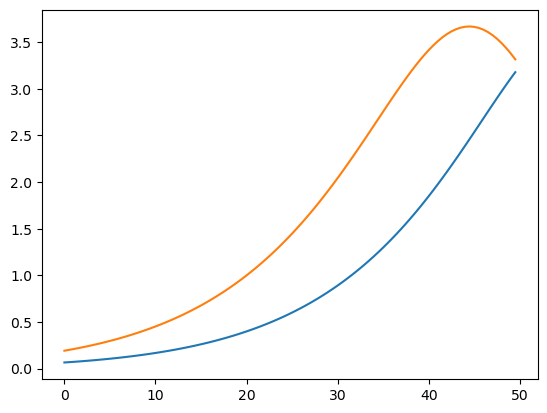

In [2]:
def calculate_temperature_effect_on_Vmax(Tair):
        """Effect of the temperature on maximal enzyme activity
        Should multiply the rate at 20ｰC

        :param float Tair: Air temperature (ｰC)

        :return: Correction to apply to enzyme activity
        :rtype: float
        """
        Tref = 20 + 273.15
        # Tk = Tair + 273.15
        Tk = Tair + 273.15 - 11.5 # zhao: temporarily minus a value
        R = 8.3144  #: Physical parameter: Gas constant (J mol-1 K-1)
        deltaHa = 55  #: Enthalpie of activation of parameter pname (kJ mol-1)
        deltaS = 0.48  #: entropy term of parameter pname (kJ mol-1 K-1)
        deltaHd = 154  #: Enthalpie of deactivation of parameter pname (kJ mol-1)

        f_activation = np.exp((deltaHa * (Tk - Tref)) / (R * 1E-3 * Tref * Tk))  #: Energy of activation (normalized to unity)

        f_deactivation = (1 + np.exp((Tref * deltaS - deltaHd) / (Tref * R * 1E-3))) / (1 + np.exp((Tk * deltaS - deltaHd) / (Tk * R * 1E-3)))  #: Energy of deactivation (normalized to unity)

        return f_activation * f_deactivation
    

temperature = np.arange(0,50,0.5)
result2 = [calculate_temperature_effect_on_Vmax(t) for t in temperature]
plt.plot(temperature, result, temperature, result2)

In [23]:
class quadratic_func:
    def __init__(self, a):
        self.a = a
        self.xrange = np.arange(-30,50,0.01)
    def __call__(self, x1, x2):
        return self.a*self.xrange**2 - (x1+x2)*self.xrange+x1*x2

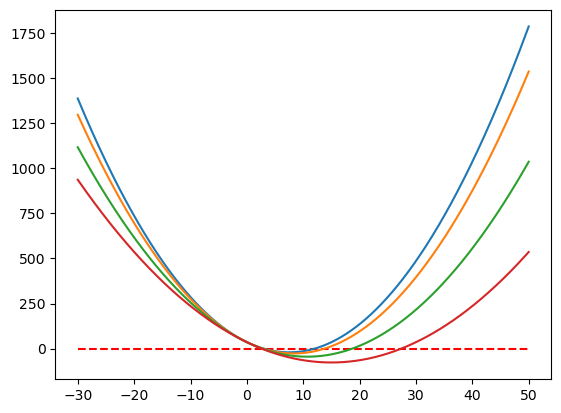

In [32]:
q1 = quadratic_func(1)
q2 = quadratic_func(0.9)
q3 = quadratic_func(0.7)
q4 = quadratic_func(0.5)

x1 = 12
x2 = 3

plt.hlines(0, xmin = q1.xrange[0], xmax = q1.xrange[-1], colors='r', linestyles='--')
plt.plot(q1.xrange, q1(x1,x2), q2.xrange, q2(x1,x2), q3.xrange, q3(x1,x2), q4.xrange, q4(x1,x2))

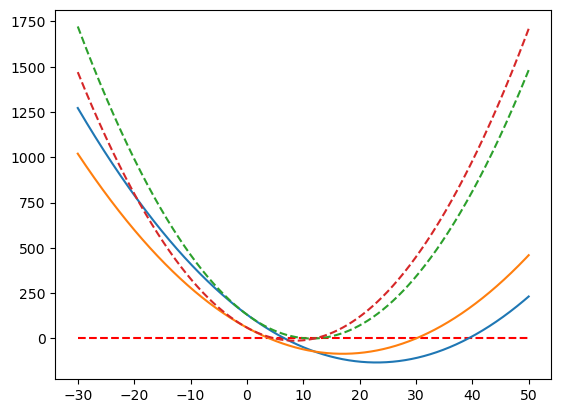

In [37]:
x11 = 12
x12 = 11

x21 = 12
x22 = 5

x31 = 12
x32 = 3

x41 = 12
x42 = 1

plt.hlines(0, xmin = q1.xrange[0], xmax = q1.xrange[-1], colors='r', linestyles='--')
plt.plot(q1.xrange, q4(x11,x12), q1.xrange, q4(x21,x22), )#q1.xrange, q2(x31,x32), q1.xrange, q2(x41,x42))
plt.plot(q1.xrange, q1(x11,x12), '--', q1.xrange, q1(x21,x22), '--')#, q1.xrange, q1(x31,x32), '--',q1.xrange, q1(x41,x42),'--')

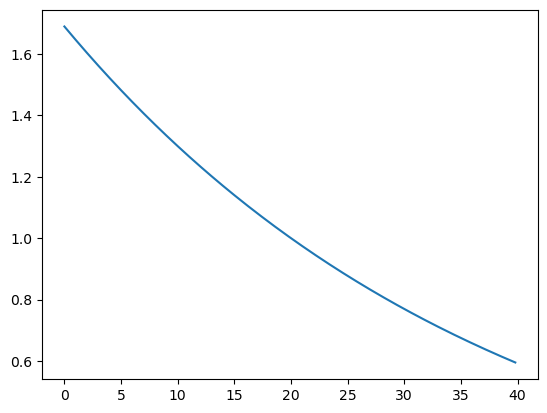

In [9]:
t = np.arange(0, 40, 0.2)
y = 1.3** ((t - 20) / 10.) # hydraulic conductivity
plt.plot(t, 1/y)

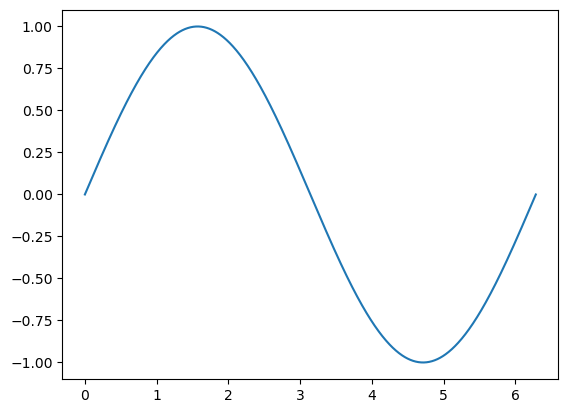

In [12]:
def unit_hyperbola_right_half(xx):
    return np.sqrt(xx**2-1)

hyper_area = np.linspace(0, 2*np.pi, 1000) # t equals to the double of the hyperbolic sector area (cosh(t), sinh(t))
hypery = np.sinh(hyper_area*1j)
hyperx = np.cosh(hyper_area*1j)

# circle_area = np.linspace(0, np.pi/4, 1000)
# y = np.sin(circle_area)
# x = np.cos(circle_area)
plt.plot(hyper_area, -1j*hypery)
# plt.axis('equal')

(0.8, 5.2, -5.388877434122992, 5.388877434122992)

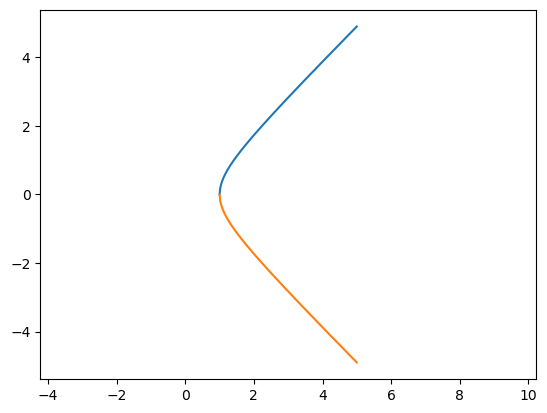

In [35]:
in_x = np.linspace(1, 5, 300)
plt.plot(in_x, unit_hyperbola_right_half(in_x), in_x, -unit_hyperbola_right_half(in_x) )
plt.axis('equal')